# A dual data-motif clustering strategy improves phosphoproteomic clustering

In [2]:
import pandas as pd
import numpy as np
import pickle
from msresist.figures.figureM1 import plotErrorAcrossMissingnessLevels, plotWinsAcrossMissingnessLevels, plotMissingnessDensity, plotErrorAcrossNumberOfClusters, plotErrorAcrossWeights
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000000)
# pd.set_option('display.max_columns', 1000)

## Import and Preprocess Data

In [5]:
# X = preprocessing(CPTAC=True, log2T=True)
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]
X.head()

,Sequence,Protein,Gene,Position,C3N.01799,C3N.01799.N,C3L.01890,C3L.01890.N,C3N.00572,C3N.00572.N,C3N.02423,C3N.02423.N,C3N.02729,C3N.02729.N,C3L.00263,...,C3N.00738,C3N.00738.N,C3N.00959,C3N.00959.N,C3N.02003,C3N.02003.N,C3N.02379.N,C3N.00175,C3N.00175.N,C3N.01823,C3N.01823.N,C3L.02549,C3L.02549.N,C3L.02365,C3L.02365.N
0,AAAAAsGGGVS,NP_002577.2,PBX2,S146-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAAAsQQGSA,NP_001308122.1,TBL1XR1,S119-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071547,-0.600298,0.172339,-1.761406,0.421872,-0.372907,-0.979491,-0.083036,-0.361962,1.275506,-0.568015,0.25423,-0.378522,0.987749,-0.189486
2,AAAAAsTQAQQ,NP_001035540.1,MINDY2,S575-p,0.012034,-0.630863,-1.159479,-0.740044,0.107228,-0.016971,-0.023379,-0.481045,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAGsASPRS,NP_064520.2,WRNIP1,S151-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAGsGPSPP,NP_060895.1,PI4K2A,S44-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83783,-0.993838,0.317079,...,0.031572,-0.554645,-0.033640,-1.268642,0.266790,-0.063300,-0.647500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribution of Missingness

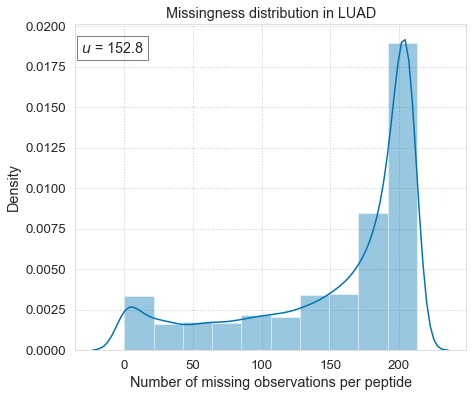

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
plotMissingnessDensity(ax, d)

## Handling Missingness

### Reconstruction Error across different percentages of missingness

Introduce artificial missing data by leaving values out, and then seeing how well that values are represented by the corresponding clusters.

PAM250:

Missingness %:  0
Weight:  0
Re-initialize GMM clusters, empty cluster(s) at iteration 1
Re-initialize GMM clusters, empty cluster(s) at iteration 3
Re-initialize GMM clusters, empty cluster(s) at iteration 4
Re-initialize GMM, NaN responsibilities at iteration 4
Re-initialize GMM clusters, empty cluster(s) at iteration 6
Re-initialize GMM clusters, empty cluster(s) at iteration 7
Re-initialize GMM clusters, empty cluster(s) at iteration 8
Re-initialize GMM clusters, empty cluster(s) at iteration 9
Re-initialize GMM, NaN responsibilities at iteration 9
Re-initialize GMM clusters, empty cluster(s) at iteration 11
Re-initialize GMM clusters, empty cluster(s) at iteration 12
Re-initialize GMM, NaN responsibilities at iteration 12
Re-initialize GMM, NaN responsibilities at iteration 13
Re-initialize GMM clusters, empty cluster(s) at iteration 15
Re-initialize GMM clusters, empty cluster(s) at iteration 16
Re-initialize GMM clusters, empty cluster(s) at iteration 17
Re-initialize GMM cluste

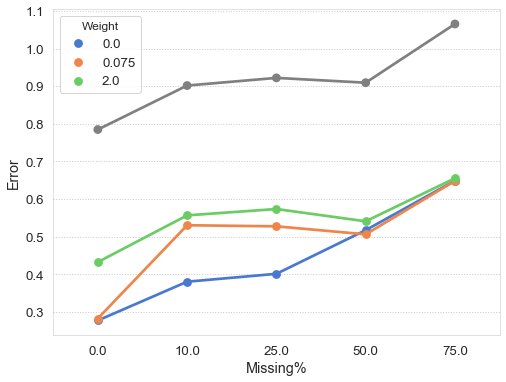

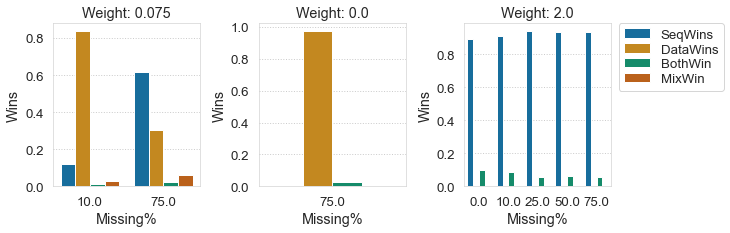

In [7]:
%%time

fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=True)
m_ = plotErrorAcrossMissingnessLevels(ax, X, [0, 0.075, 2], "PAM250", 15, 50, baseline=True)

fig, ax = plt.subplots(1, 3, figsize=(10,3))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plotWinsAcrossMissingnessLevels(ax, m_)

Binomial:

In [2]:
%%time

fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=True)
m_ = plotErrorAcrossMissingnessLevels(ax, X, [0, 2, 10], "Binomial", 20, 50, baseline=True)

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plotWinsAcrossMissingnessLevels(ax, m_)

### Reconstruction Error across different number of clusters

Re-initialize GMM, NaN responsibilities at iteration 2
Re-initialize GMM, NaN responsibilities at iteration 1
Re-initialize GMM, NaN responsibilities at iteration 3
Re-initialize GMM, NaN responsibilities at iteration 5
Re-initialize GMM, NaN responsibilities at iteration 7
Re-initialize GMM, NaN responsibilities at iteration 1
Re-initialize GMM, NaN responsibilities at iteration 3
CPU times: user 58min 16s, sys: 8min 30s, total: 1h 6min 46s
Wall time: 3h 14min 24s


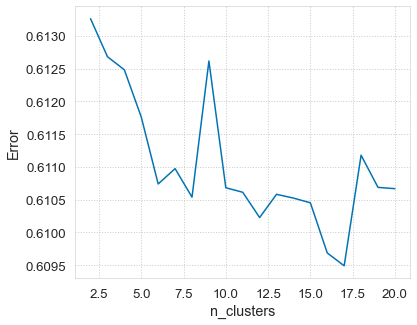

In [17]:
%%time
fig, ax = plt.subplots(1,1,figsize=(6,5))
plotErrorAcrossNumberOfClusters(ax, X, 0.075, "PAM250", np.arange(2, 21), 200)

In [58]:
# %%time
# fig, ax = plt.subplots(1,1,figsize=(6,5))
# plotErrorAcrossWeights(ax, X, 0.1, [0, 0.1, 0.25, 0.5, 0.75, 1, 2], "PAM250", 10, 200)